# Unsupervised Learning
- 비지도 학습 (학습용 data에 target이 없는 경우)
- data 안에 들어있는 숨겨진 pattern을 찾아내고 구조화(clustering)
- 알고리즘
    1. K-means 알고리즘(특정 data 형식에 대해서는 잘 동작하지 않음)
    2. DBSCAN

# K-means 알고리즘
- K -> cluster의 수, hyper parameter
- means -> cluster의 중심 centroid와 데이터간의 평균 거리
    - 유클리드 거리
    - 맨해튼 거리
- EM 알고리즘으로 동작
    - E(expectation)의 의미로 가장 가까운 centroid에 데이터를 군집으로 할당
    - M(maximization)의 의미로 cluster 경계에 대한 중심점을 결정

- 방법
    1. random한 centroids를 지정된 k의 개수로 형성
    2. 모든 data에 대해 각 centroids와의 거리를 계산하여 가장 가까운 centroid와 cluster로 묶임
    3. 묶인 cluster의 경계에 맞게 centroid를 update
    4. update된 centroid와 모든 점의 거리를 다시 계산하고 cluster를 다시 생성
    5. 새롭게 update된 cluster가 만들어지고, 3번부터 반복
    6. cluster가 변함이 없는 시점이 생기면 cluster확정. 이 알고리즘을 여러 번 반복하여 가장 좋은 cluster 결정

- 주의
    1. k의 개수 설정 -> Elbow method
    2. random한 centroids 설정

- 장점
    1. 속도면에서 장점
    2. 직관적

(100, 2)
(100,)
(array([0, 1, 2, 3]), array([25, 25, 25, 25]))


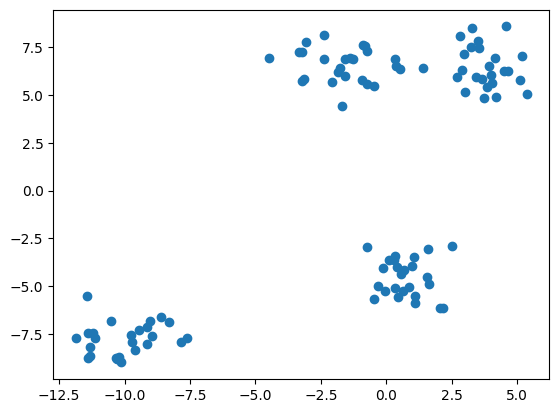

In [ ]:
# 중심점이 4개인 데이터 100개를 무작위로 생성해서 정상적으로 클러스터가 생성되는지 확인

# Module import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# 중심점이 4개인 100개의 랜덤 데이터를 생성
# n_samples: 전체 데이터 포인트의 수
# centers: cluster의 수
# n_features: 각 데이터 포인트의 feature 개수(데이터의 차원)
# points: 생성된 데이터의 feature
# labels: 각 데이터 포인트의 소속 클러스터 레이블
points, labels = make_blobs(n_samples=100,
                            centers=4,
                            n_features=2,
                            random_state=100)

print(points.shape)  # (100, 2)
print(labels.shape)  # (100,)
print(np.unique(labels, return_counts=True))  # array([0, 1, 2, 3]), array([25, 25, 25, 25]))

plt.scatter(points[:, 0], points[:, 1])
plt.show()

In [ ]:
# k-means는 hyperparameter가 k값, 클러스터의 개수
# centroids가 random하게 생성되므로 여러 번 알고리즘 작동
# n_init: k-means 알고리즘을 여러번 실행해 가장 좋은 경우를 선택 초깃값은 10.
#         과거에는 이 값을 직접 설정했으나 웬만하면 auto로 설정
kmeans_cluster = KMeans(n_clusters=4,
                        n_init='auto',
                        max_iter=100,
                        verbose=1,
                        random_state=100)

# 모델 학습
kmeans_cluster.fit(points)

# 결과 출력
# labels_: 분류가 끝난 클러스터 값
print(kmeans_cluster.labels_)

Initialization complete
Iteration 0, inertia 361.7427692990723.
Iteration 1, inertia 199.55133864382225.
Iteration 2, inertia 198.96173255988515.
Converged at iteration 2: strict convergence.
[1 3 3 0 0 1 1 2 0 2 0 0 1 2 1 2 3 3 3 2 2 2 2 0 1 3 2 3 2 1 1 1 1 2 3 2 2
 3 0 2 1 3 0 3 2 2 3 3 1 0 1 2 0 3 1 1 2 3 3 2 1 0 2 1 1 0 2 0 2 1 0 3 0 1
 2 3 3 3 0 1 0 0 0 3 1 2 0 0 2 3 0 3 3 1 0 1 0 3 1 0]


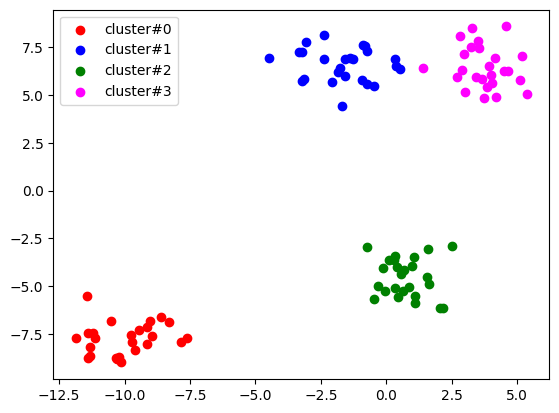

In [ ]:
# clustering한 결과를 시각화
my_color = {0: 'red', 1: 'blue', 2: 'green', 3: 'magenta'}

# 각 cluster마다 scatter를 반복적으로 그리기
for n in range(4):
    cluster_sub_points = points[kmeans_cluster.labels_ == n]
    plt.scatter(cluster_sub_points[:,0],
                cluster_sub_points[:,1],
                color=my_color[n],
                label=f'cluster#{n}')

plt.legend()
plt.show()

In [ ]:
# predict
new_point = np.array([[0.0, 0.0]])
result_cluster = kmeans_cluster.predict(new_point)

print(result_cluster) # [2]

# 랜덤데이터를 이용해서 K-means 알고리즘이 동작하는 걸 확인

[2]


### Iris
- 독립변수 4개
- 종속변수 3가지 종류 -> 다중분류 예제로 많이 사용
- 독립변수를 4개 사용하면 2차원 평면에 그림을 그릴 수가 없음
- 2차원 평면에 클러스터링이 된 결과를 확인하기 위해
- 꽃받침의 길이, 꽃받침의 너비 두 개의 feature만 사용

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

              sepal_length  sepal_width  petal_length  petal_width    target
sepal_length      1.000000    -0.117570      0.871754     0.817941  0.782561
sepal_width      -0.117570     1.000000     -0.428440    -0.366126 -0.426658
petal_length      0.871754    -0.428440      1.000000     0.962865  0.949035
petal_width       0.817941    -0.366126      0.962865     1.000000  0.956547
target            0.782561    -0.426658      0.949035     0.956547  1.000000


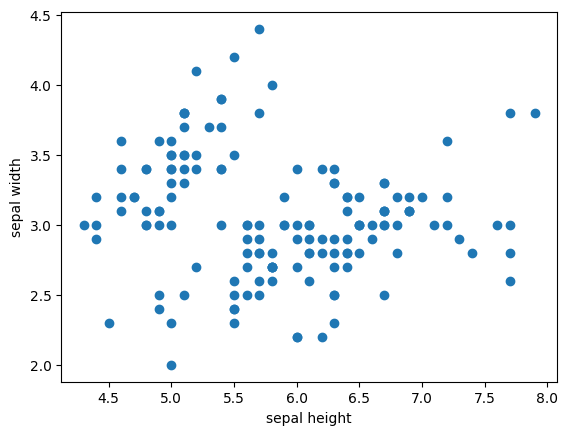

In [ ]:
# Raw Data Loading
Iris = load_iris()

# DataFrame
df = pd.DataFrame(Iris['data'], columns=Iris['feature_names'])
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df['target'] = Iris['target']

# corr 확인 및 상관계수 높은 칼럼 삭제(2차원 평면에 나타내기 위해)
print(df.corr())
df = df.drop(['petal_length', 'petal_width'], axis=1)

# feature, target data 분할
x_data = df.drop('target', axis=1, inplace=False)
t_data = df['target']

# 그래프 확인
plt.scatter(x_data['sepal_length'],
            x_data['sepal_width'])
plt.xlabel('sepal height')
plt.ylabel('sepal width')
plt.show()

In [ ]:
kmeans_cluster = KMeans(n_clusters=3,
                        n_init='auto')

kmeans_cluster.fit(x_data)

labels = kmeans_cluster.labels_

print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 2 1 2 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1
 2 2 2 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


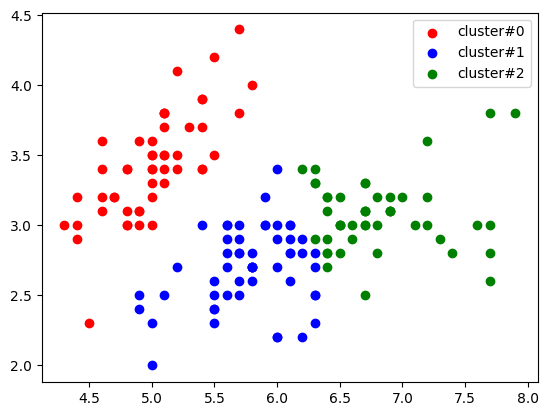

In [ ]:
my_color = {0: 'red', 1: 'blue', 2: 'green'}

for n in range(3):
    cluster_sub_points = x_data[kmeans_cluster.labels_ == n]
    plt.scatter(cluster_sub_points.loc[:, 'sepal_length'],
                cluster_sub_points.loc[:, 'sepal_width'],
                color=my_color[n],
                label=f'cluster#{n}')

plt.legend()
plt.show()

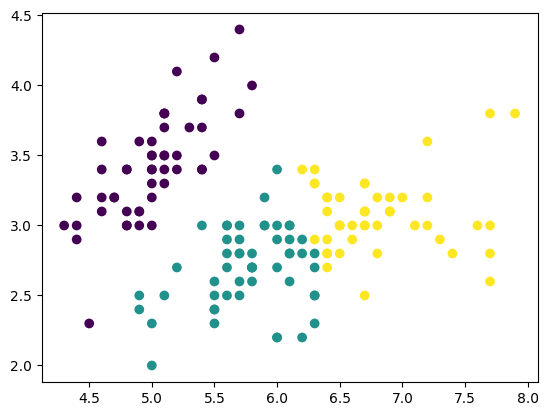

In [ ]:
plt.scatter(x_data.loc[:, 'sepal_length'],
            x_data.loc[:, 'sepal_width'],
            c=labels)
plt.show()

### K-Means clustering이 잘 되지 않는 경우
- Iris Data Set로 clustering이 되는 걸 확인
- 웬만한 clustering을 위한 학습과 예측은 K-Menas알고리즘으로 해결 가능
- 주어진 데이터의 분포에 따라 의도치 않은 상황이 발생할 수 있음
- K-Means로 clustering이 잘 되지 않는 경우는 크게 3가지 존재
    1. 데이터가 원형 데이터인 경우에는 정삭적으로 작동하지 않음
    2. 달 모양 데이터
    3. 대각선 모양의 데이터


(100, 2)
(100,)


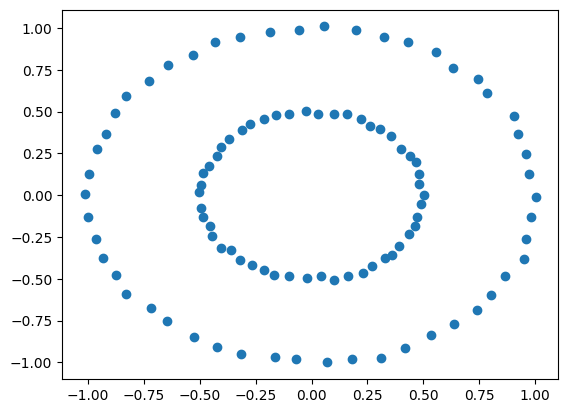

[0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 1 1 1 0 0 1 0
 1 0 1 1 1 1 1 0 1 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1
 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0]


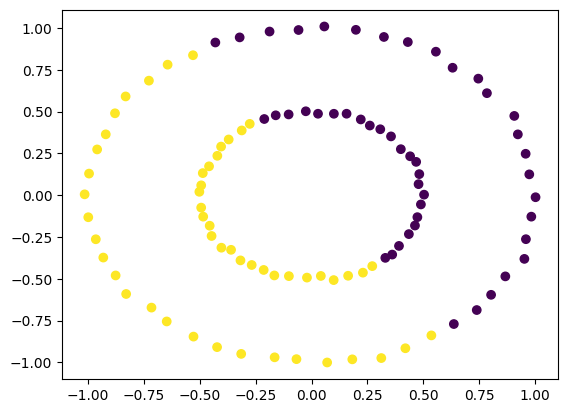

In [ ]:
# 원형으로 되어 있는 데이터 확보
from sklearn.datasets import make_circles

# 이 함수는 두 개의 원으로 이루어진 데이터 생성
# n_samples: 데이터의 총 개수
# factor: 값이 0에 가까울 수록 두 원의 거리가 멀어지고, 1에 가까울 수록 거리가 가까워짐
# noise: 데이터에 추가되는 무작위 노이즈의 양
circle_points, circle_labels = make_circles(n_samples=100,
                                            factor=0.5,
                                            noise=0.01)

print(circle_points.shape)  # (100, 2)
print(circle_labels.shape)

# 데이터 분포 확인
plt.scatter(circle_points[:, 0],
            circle_points[:, 1])
plt.show()

# 의미상 안쪽 원에 모여있는 데이터, 바깥쪽에 퍼져있는 데이터로 인식
# clustering을 진행했을 때의 결과 확인
kmeans_cluster = KMeans(n_clusters=2,
                        n_init='auto')

kmeans_cluster.fit(circle_points)

labels = kmeans_cluster.labels_

print(labels)

plt.scatter(circle_points[:, 0],
            circle_points[:, 1],
            c=labels)
plt.show()

# 원을 반으로 나눈 것을 확인
# 원형 데이터 분포는 K-means 알고리즘이 클러스터를 정상적으로 나누지 않음

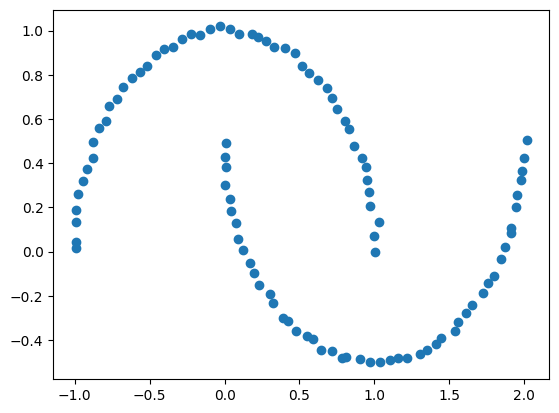

[0 0 1 0 1 0 0 0 1 0 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1
 1 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1
 0 1 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 0 0]


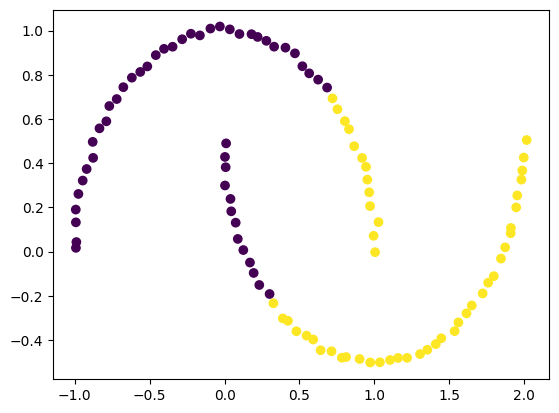

In [ ]:
# 두 번째 달 모양 데이터
from sklearn.datasets import make_moons

moon_points, moon_labels = make_moons(n_samples=100,
                                      noise=0.01)

plt.scatter(moon_points[:, 0],
            moon_points[:, 1])
plt.show()

# cluster 확인
moon_cluster = KMeans(n_clusters=2,
                        n_init='auto')

moon_cluster.fit(moon_points)

labels = moon_cluster.labels_

print(labels)

plt.scatter(moon_points[:, 0],
            moon_points[:, 1],
            c=labels)
plt.show()


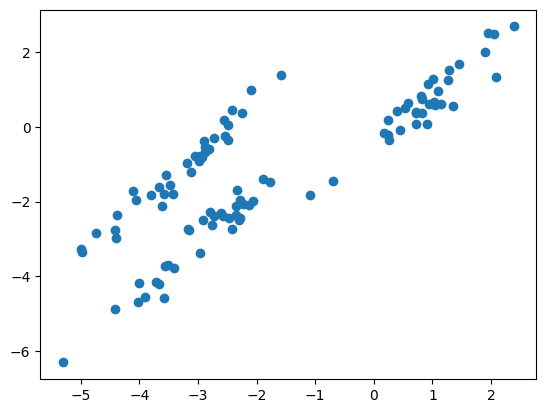

[0 1 1 0 0 2 2 0 1 0 0 2 0 0 0 1 2 0 0 1 1 1 1 1 0 0 0 1 0 0 1 0 0 1 0 2 2
 2 0 1 1 0 1 0 0 0 1 1 0 2 1 1 2 1 0 2 0 2 0 0 0 0 0 1 0 1 1 0 0 0 0 2 2 0
 0 0 1 0 0 2 0 0 1 0 0 0 2 1 1 2 1 1 0 2 1 1 2 0 0 1]


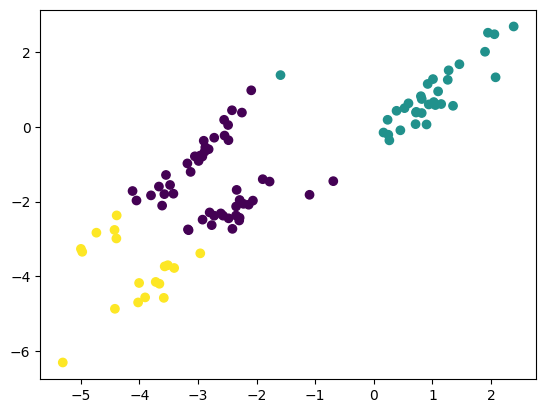

In [ ]:
# 세 번째 대각선 모양의 데이터
from sklearn.datasets import make_blobs

diag_points, _ = make_blobs(n_samples=100,
                            random_state= 170)

# 대각행렬을 이용해서 데이터를 대각선 분포로 변형
transformation = [[0.6, 0.6],
                  [-0.4, -0.8]]

diag_points = np.dot(diag_points, transformation)

plt.scatter(diag_points[:, 0],
            diag_points[:, 1])
plt.show()

# cluster 확인
diag_cluster = KMeans(n_clusters=3,
                        n_init='auto')

diag_cluster.fit(diag_points)

labels = diag_cluster.labels_

print(labels)

plt.scatter(diag_points[:, 0],
            diag_points[:, 1],
            c=labels)
plt.show()

# DBSCAN
- K-Means 알고리즘은 거리가 멀면서 밀접한 연관을 가지는 데이터에 대해서 cluster를 잘 만들지 못 함
    - 이를 해결하기 위해 DBSCAN
    - [Density Based Spatial Clustering of Application with Noise](https://primo.ai/index.php?title=Density-Based_Spatial_Clustering_of_Applications_with_Noise_(DBSCAN))
    - 밀도 기반
    - 데이터의 양이 늘어나면 속도가 많이 느려질 수 있음

- 특징
    1. K-means처럼 클러스터의 개수 K를 지정할 필요가 없음
    2. 거리 기반이 아닌 밀도 기반(조밀하게 몰려있는 클러스터를 생성)

- 용어
    - epsilon: 클러스터의 반경
    - minPts: 클러스터를 이루는 최소 개체수
    - core point: cluster의 중심점
    -

- 알고리즘
    1. 임의의 데이터 p를 설정. p를 포함해서 epsilon 안의 데이터 개수를 센다
    2. 해당 cluster에 minPts개 이상의 data가 존재하면 **P가 core point가 되고 하나의 cluster 생성**
    3. 새로운 P´가 core point가 되고 이 점이 기존의 cluster에 속한다면 하나의 cluster로 묶음

(100, 2)
(100,)


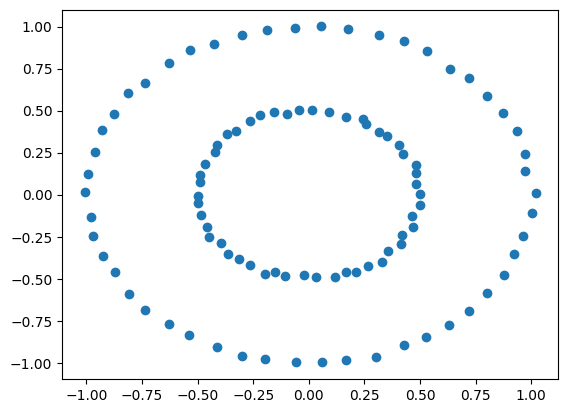

2
[0 1 1 0 0 0 1 0 1 1 0 1 1 1 0 1 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 0 1 1 1 0 0
 0 1 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1
 1 0 0 1 1 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 1 1]


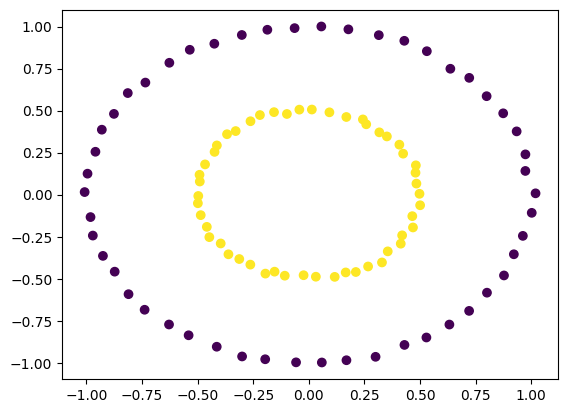

In [ ]:
# 원형으로 되어 있는 데이터 확보
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN

# 이 함수는 두 개의 원으로 이루어진 데이터 생성
# n_samples: 데이터의 총 개수
# factor: 값이 0에 가까울 수록 두 원의 거리가 멀어지고, 1에 가까울 수록 거리가 가까워짐
# noise: 데이터에 추가되는 무작위 노이즈의 양
circle_points, circle_labels = make_circles(n_samples=100,
                                            factor=0.5,
                                            noise=0.01)

print(circle_points.shape)  # (100, 2)
print(circle_labels.shape)

# 데이터 분포 확인
plt.scatter(circle_points[:, 0],
            circle_points[:, 1])
plt.show()

# 의미상 안쪽 원에 모여있는 데이터, 바깥쪽에 퍼져있는 데이터로 인식
# clustering을 진행했을 때의 결과 확인
kmeans_cluster = DBSCAN(eps=0.2,
                        min_samples=3)

kmeans_cluster.fit(circle_points)

# cluster 개수
print(np.max(kmeans_cluster.labels_) + 1)

# label
labels = kmeans_cluster.labels_

print(labels)

# 그래프
plt.scatter(circle_points[:, 0],
            circle_points[:, 1],
            c=labels)
plt.show()

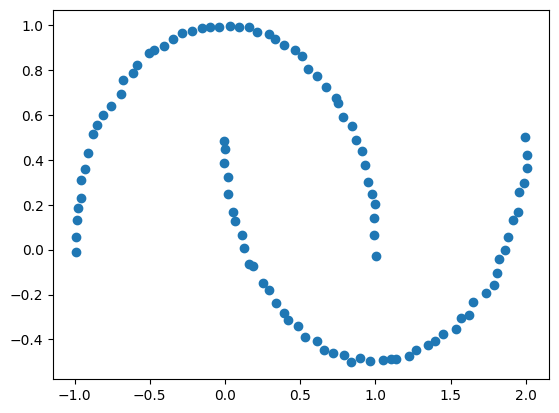

2
[0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0
 1 1 1 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 1
 1 0 1 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 0 0 1]


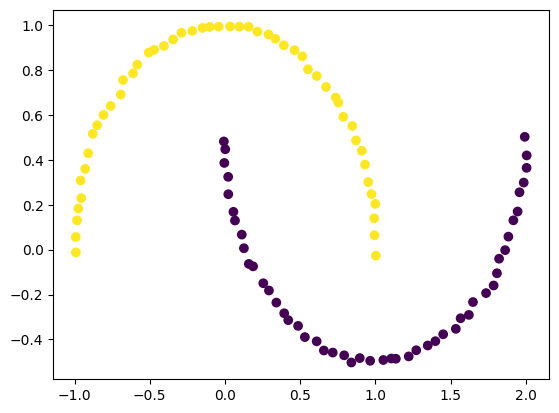

In [ ]:
# 두 번째 달 모양 데이터
from sklearn.datasets import make_moons

moon_points, moon_labels = make_moons(n_samples=100,
                                      noise=0.01)

plt.scatter(moon_points[:, 0],
            moon_points[:, 1])
plt.show()

# cluster 확인
moon_cluster = DBSCAN(eps=0.2,
                      min_samples=3)

moon_cluster.fit(moon_points)

# cluster 개수
print(np.max(moon_cluster.labels_) + 1)

# cluster labels
labels = moon_cluster.labels_

print(labels)

# 그래프
plt.scatter(moon_points[:, 0],
            moon_points[:, 1],
            c=labels)
plt.show()

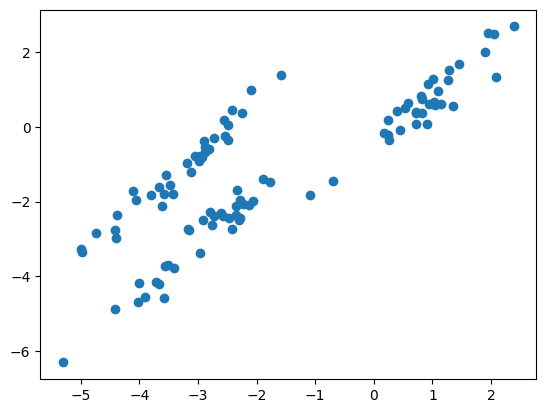

3
[ 0  1  1  0  0  2  2  0  1  2  2  2  0  2  0  1  2  2  2  1  1  1  1  1
  2  2  0  1  0  2  1  0  2  1  2  0  0  0  0  0  1  0  1  0  0  2  1  1
  0  2  1  1  2  1  0  2 -1  2  0  0  2  0  0  1  0  1  1  2  2  2 -1  0
  2  0  0  0  1  2  2 -1  2  2  1  2  0  0  2  1  1  2  1  1  2  0  1  1
  0  0  0  1]


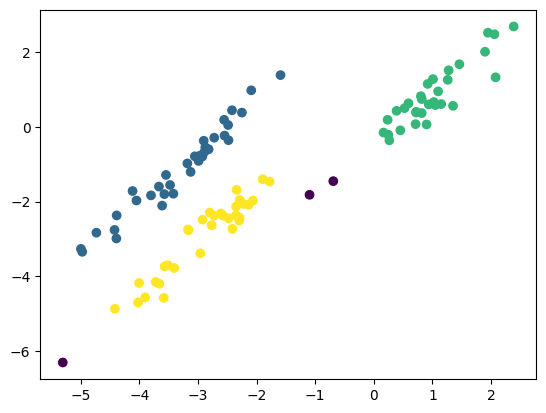

In [ ]:
# 세 번째 대각선 모양의 데이터
from sklearn.datasets import make_blobs

diag_points, _ = make_blobs(n_samples=100,
                            random_state= 170)

# 대각행렬을 이용해서 데이터를 대각선 분포로 변형
transformation = [[0.6, 0.6],
                  [-0.4, -0.8]]

diag_points = np.dot(diag_points, transformation)

plt.scatter(diag_points[:, 0],
            diag_points[:, 1])
plt.show()

# cluster 확인
diag_cluster = DBSCAN(eps=0.75,
                      min_samples=3)

diag_cluster.fit(diag_points)

# cluster 개수
print(np.max(diag_cluster.labels_) + 1)

# label
labels = diag_cluster.labels_

print(labels)

# 그래프
plt.scatter(diag_points[:, 0],
            diag_points[:, 1],
            c=labels)
plt.show()

# 차원 축소(Dimension Reduction)
- 고차원 Data의 경우 상대적으로 sparse하기 때문에 분석과 학습(overfitting 발생)이 힘듦
- 고차원 Data를 저차원 Data로 변환
    - **[전제]** 저차원 data 표현이 고차원 원본 data를 잘 표현할 수 있어야 함
    - 필연적으로 정보 손실의 문제가 발생

- 장점
    - 시각화가 가능
    - 속도를 높이고 데이터량을 줄일 수 있음

- 차원 축소에 관한 알고리즘
    - 선형 방식(Projection)
        - 주성분 분석(PCA, Principal Component Analysis)
        - 특잇값 분해(SVD)
        - 요인 분석
    
    - 비선형 방식(Manifold)
        - LLE
        - Isomap
    

In [ ]:
# 주성분 분석(PCA)
# Iris 데이터
# 독립변수에 대해 상관관계 분석을 해 보면 상관계수가 높은 feature 존재
# 이런 경우 차원축소를 이용하면 더 좋은 효과를 얻을 수 있음
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Raw Data Loading
Iris = load_iris()
df_iris = pd.DataFrame(Iris.data, columns=Iris.feature_names)
df_iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# 상관관계 분석
# 인과관계로 설명하지 않는다는 점을 주의
df_iris.corr()
# feature간의 연관성이 깊음
# 주성분 분석을 통해 차원을 축소하면 데이터 로스가 발생하겠지만
# 모델의 복잡도가 줄고 overfitting도 줄어서 더 좋은 모델이 만들어질 수도 있다.

# 주성분을 몇 개로 하는 것이 좋을까?
# 이 개수를 구하기 위해 주성분의 분산 계산
from sklearn.decomposition import PCA

pca = PCA(random_state=1004) # 주성분의 개수를 안 줬기 때문에 그대로 사용
                             # 주성분의 분산을 구하기 위해

pca.fit_transform(df_iris)

pca.explained_variance_ratio_  # 주성분의 분산 비율 확인
# array([0.92461872, 0.05306648, 0.01710261, 0.00521218])
# 첫 번째 column이 전체 데이터의 92% 반영, 두 번째 cloumn까지 97.7%


array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [ ]:
# 이전 다중분류 모델과
# PCA로 차원 축소를 진행한 데이터로 학습한 모델의 정확도 비교

# Module import
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Raw Data Loading
Iris = load_iris()

x_data = Iris.data
t_data = Iris.target

# 결측치와 이상치는 처리하지 않음
# 정규화 진행
scaler = StandardScaler()
x_data_norm = scaler.fit_transform(x_data)

x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = train_test_split(x_data_norm,
                                                                                  t_data,
                                                                                  stratify=t_data,
                                                                                  test_size=0.3,
                                                                                  random_state=42)

# 차원축소를 진행한 데이터
n_components = 2
pca = PCA(n_components=n_components)
x_data_norm_pca = pca.fit_transform(x_data_norm)

x_data_train_norm_pca, x_data_test_norm_pca, t_data_train_pca, t_data_test_pca = train_test_split(x_data_norm_pca,
                                                                                                  t_data,
                                                                                                  stratify=t_data,
                                                                                                  test_size=0.3,
                                                                                                  random_state=42)

In [ ]:
# Original Model
keras_original_model = Sequential()

# Layers
keras_original_model.add(Flatten(input_shape=(4,)))

keras_original_model.add(Dense(units=3,
                               activation="softmax"))

# Compile
keras_original_model.compile(optimizer=Adam(learning_rate=1e-2),
                             loss='sparse_categorical_crossentropy',
                             metrics=['acc'])

# 학습
keras_original_model.fit(x_data_train_norm,
                         t_data_train,
                         epochs=300,
                         verbose=0,
                         validation_split=0.2)

# 3/3 [==============================] - 0s 18ms/step - loss: 0.0875 - acc: 0.9643 - val_loss: 0.0588 - val_acc: 1.0000

# Evaluation
eval = keras_original_model.evaluate(x_data_test_norm, t_data_test)
print(eval)  # [0.18668118119239807, 0.9111111164093018]


2/2 [==============================] - 0s 9ms/step - loss: 0.1867 - acc: 0.9111
[0.18668118119239807, 0.9111111164093018]


In [ ]:
# PCA Data Model
keras_pca_model = Sequential()

# Layers
keras_pca_model.add(Flatten(input_shape=(2,)))

keras_pca_model.add(Dense(units=3,
                          activation="softmax"))

# Compile
keras_pca_model.compile(optimizer=Adam(learning_rate=1e-2),
                        loss='sparse_categorical_crossentropy',
                        metrics=['acc'])

# 학습
keras_pca_model.fit(x_data_train_norm_pca,
                    t_data_train_pca,
                    epochs=300,
                    verbose=0,
                    validation_split=0.2)

# 3/3 [==============================] - 0s 35ms/step - loss: 0.2397 - acc: 0.8929 - val_loss: 0.2482 - val_acc: 0.8571

# Evaluation
eval = keras_pca_model.evaluate(x_data_test_norm_pca, t_data_test_pca)

print(eval)  # [0.30932846665382385, 0.9111111164093018]

2/2 [==============================] - 0s 12ms/step - loss: 0.3093 - acc: 0.9111
[0.30932846665382385, 0.9111111164093018]
